In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
cd /content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos

/content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/MELHORES AUDIOS/Doritos


In [35]:
!ls

dados.xlsx	 DoritosD027.wav  DoritosD112.wav  DoritosD235.wav
DoritosD022.wav  DoritosD098.wav  DoritosD130.wav
DoritosD023.wav  DoritosD099.wav  DoritosD189.wav
DoritosD026.wav  DoritosD100.wav  DoritosD192.wav


In [36]:
# Replace 'file' with the actual path to your audio file
file = 'DoritosD026.wav'

Ad. Energia Sonora =  3.914797678589821
onset_env= [6.533847  0.4921317]
Ad. dos Picos de Amplitude =  2.1506407260894775


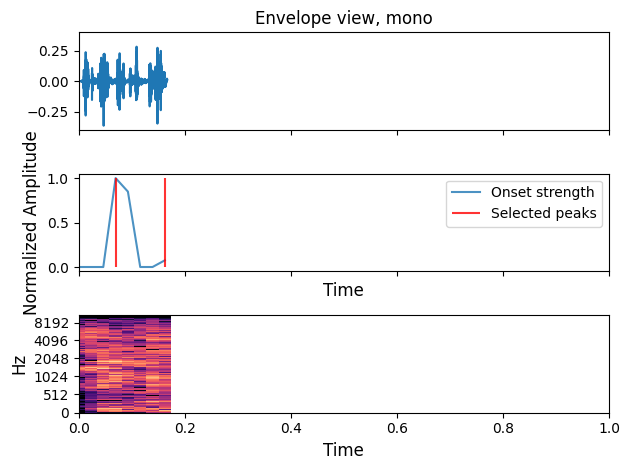

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd

y, sr = librosa.load(file, duration=1.0)
time = np.arange(0, len(y)) / sr

# Ad. energia Sonora
# Detect the silence regions
threshold = 20  # threshold in dB
silence_regions = librosa.effects.split(y, top_db=threshold)

# Remove the silence regions from the audio signal
y_trimmed = np.concatenate([y[start:end] for start, end in silence_regions])

# Compute the energy of each frame
frame_length = int(sr * 0.01)  # frame length in samples (10 ms frames)
hop_length = int(sr * 0.005)  # hop length in samples (5 ms hops)
energy = librosa.feature.rms(y=y_trimmed, frame_length=frame_length, hop_length=hop_length)

# Compute the median energy
avg_energy = np.mean(energy) * 100
print('Ad. Energia Sonora = ', avg_energy)

# Parameters for peak picking
pre_max = 1     # Consider peaks close to the current frame
post_max = 1    # Consider peaks close to the current frame
pre_avg = 1     # Calculate average from the immediate previous frame
post_avg = 1    # Calculate average from the immediate next frame
delta = 0.1     # Lower threshold for peak detection
wait = 1        # Allow peaks to be detected in consecutive frames

# Ad. dos picos de Amplitude
onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512, aggregate=np.median)
peaks = librosa.util.peak_pick(
    onset_env, pre_max=pre_max, post_max=post_max, pre_avg=pre_avg, post_avg=post_avg, delta=delta, wait=wait)
times = librosa.times_like(onset_env, sr=sr, hop_length=512)
print('onset_env=', onset_env[peaks])

in_sum = onset_env[peaks]
suma = in_sum / max(in_sum)
value = sum(suma) * len(suma)
print('Ad. dos Picos de Amplitude = ', value)

ons = onset_env / max(onset_env)

import matplotlib.pyplot as plt
y, sr = librosa.load(file, duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

ax[1].plot(times, ons, alpha=0.8, label='Onset strength')
ax[1].set_ylabel('Normalized Amplitude', fontsize=12)
ax[1].vlines(times[peaks], 0, ons.max(), color='r', alpha=0.8, label='Selected peaks')
ax[1].legend(frameon=True, framealpha=0.8)
ax[1].axis('tight')
ax[1].set_xlabel('Time', fontsize=12)
ax[1].set_xlim([0, 1])

D = librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D)**2, ref=np.max), y_axis='mel', x_axis='time', ax=ax[2])
ax[2].set_xscale('linear')
ax[2].set_ylabel('Hz', fontsize=12)
ax[2].set_xlabel('Time', fontsize=12)
ax[2].set_xlim([0, 1])

plt.tight_layout()

# Get the current working directory
original_directory = os.getcwd()

# Move up to the parent directory
os.chdir("..")

# Specify the filename for the figure
figure_filename = f'{file}.png'

# Save the figure in the parent directory
plt.savefig(figure_filename)

# Return to the original directory
os.chdir(original_directory)

# Show the plot
plt.show()
